In [179]:
import pandas as pd
import numpy as np

In [180]:
data=pd.read_csv("data_train.csv")

In [181]:
data.head()

,Air Service,Flight Direction/Routine,About,Layover,Time span,Cost,Flight Date,Start,Stop,Take off time,Landing time
0,IndiGo,BLR → DEL,No info,non-stop,2h 50m,3897,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar
1,Air India,CCU → IXR → BBI → BLR,No info,2 stops,7h 25m,7662,1/05/2019,Kolkata,Banglore,05:50,13:15
2,Jet Airways,DEL → LKO → BOM → COK,No info,2 stops,19h,13882,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun
3,IndiGo,CCU → NAG → BLR,No info,1 stop,5h 25m,6218,12/05/2019,Kolkata,Banglore,18:05,23:30
4,IndiGo,BLR → NAG → DEL,No info,1 stop,4h 45m,13302,01/03/2019,Banglore,New Delhi,16:50,21:35


### Data understanding and basic cleaning (checking for null values)

In [182]:
data.shape

(10683, 11)

In [183]:
data.sample(5)

,Air Service,Flight Direction/Routine,About,Layover,Time span,Cost,Flight Date,Start,Stop,Take off time,Landing time
9783,IndiGo,DEL → HYD → COK,No info,1 stop,4h 35m,5073,27/04/2019,Delhi,Cochin,07:35,12:10
3706,Air India,CCU → DEL → BLR,No info,1 stop,26h 45m,10808,24/03/2019,Kolkata,Banglore,20:30,23:15 25 Mar
3234,SpiceJet,CCU → PNQ → BLR,No info,1 stop,8h 40m,6013,1/04/2019,Kolkata,Banglore,08:35,17:15
4574,SpiceJet,MAA → CCU,No info,non-stop,2h 15m,3597,3/05/2019,Chennai,Kolkata,08:20,10:35
1139,Jet Airways,CCU → BOM → BLR,In-flight meal not included,1 stop,14h 50m,9663,12/05/2019,Kolkata,Banglore,21:10,12:00 13 May


In [184]:
nullcount=data.isnull().sum()
print("Null values in df are {}".format(nullcount))

Null values in df are Air Service                 0
Flight Direction/Routine    1
About                       0
Layover                     1
Time span                   0
Cost                        0
Flight Date                 0
Start                       0
Stop                        0
Take off time               0
Landing time                0
dtype: int64


In [185]:
data.dropna(axis=1)

,Air Service,About,Time span,Cost,Flight Date,Start,Stop,Take off time,Landing time
0,IndiGo,No info,2h 50m,3897,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar
1,Air India,No info,7h 25m,7662,1/05/2019,Kolkata,Banglore,05:50,13:15
2,Jet Airways,No info,19h,13882,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun
3,IndiGo,No info,5h 25m,6218,12/05/2019,Kolkata,Banglore,18:05,23:30
4,IndiGo,No info,4h 45m,13302,01/03/2019,Banglore,New Delhi,16:50,21:35
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,No info,2h 30m,4107,9/04/2019,Kolkata,Banglore,19:55,22:25
10679,Air India,No info,2h 35m,4145,27/04/2019,Kolkata,Banglore,20:45,23:20
10680,Jet Airways,No info,3h,7229,27/04/2019,Banglore,Delhi,08:20,11:20
10681,Vistara,No info,2h 40m,12648,01/03/2019,Banglore,New Delhi,11:30,14:10


In [186]:
nullcountafter=data.isnull().sum()
print("Null values in df after dropping are {}".format(nullcountafter))

Null values in df after dropping are Air Service                 0
Flight Direction/Routine    1
About                       0
Layover                     1
Time span                   0
Cost                        0
Flight Date                 0
Start                       0
Stop                        0
Take off time               0
Landing time                0
dtype: int64


In [187]:
duprows=data.duplicated(keep='last')
print(len(duprows))

10683


In [188]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()
print(data[data["Layover"].isnull()][null_columns])

     Flight Direction/Routine Layover
9039                      NaN     NaN


In [189]:
data=data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

### Scaling and normalizing data

In [190]:
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt

In [191]:
np.random.seed(0)

Text(0.5, 1.0, 'Scaled data')

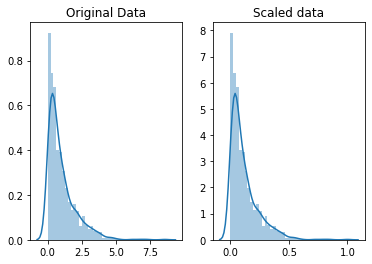

In [192]:
odata=np.random.exponential(size=1000)
sdata=minmax_scaling(odata,columns=[0])
fig, ax=plt.subplots(1,2)
sns.distplot(odata, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(sdata, ax=ax[1])
ax[1].set_title("Scaled data")

Text(0.5, 1.0, 'Normalized data')

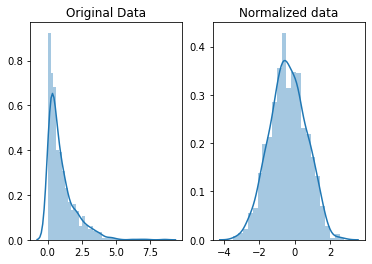

In [193]:
ndata = stats.boxcox(odata)
fig, ax=plt.subplots(1,2)
sns.distplot(odata, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(ndata[0], ax=ax[1])
ax[1].set_title("Normalized data")

### Dropping a few columns after analysis

In [194]:
data=data.drop(["Flight Direction/Routine","Take off time","Landing time"],axis=1)

In [195]:
data.head()

,Air Service,About,Layover,Time span,Cost,Flight Date,Start,Stop
0,IndiGo,No info,non-stop,2h 50m,3897,24/03/2019,Banglore,New Delhi
1,Air India,No info,2 stops,7h 25m,7662,1/05/2019,Kolkata,Banglore
2,Jet Airways,No info,2 stops,19h,13882,9/06/2019,Delhi,Cochin
3,IndiGo,No info,1 stop,5h 25m,6218,12/05/2019,Kolkata,Banglore
4,IndiGo,No info,1 stop,4h 45m,13302,01/03/2019,Banglore,New Delhi


In [196]:
data.shape

(10682, 8)

### Encoding the different categorical featuries

In [207]:
from sklearn import preprocessing 
categorical_feature_mask = ('non-stop','2 stops','1 stop')
label_encoder = preprocessing.LabelEncoder()
data['Layover']= label_encoder.fit_transform(data['Layover']) 
data['Layover'].unique()

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9], dtype=int64)

In [208]:
data.head()

,Air Service,About,Layover,Time span,Cost,Flight Date,Start,Stop
0,IndiGo,No info,3,2h 50m,3897,24/03/2019,Banglore,New Delhi
1,Air India,No info,1,7h 25m,7662,1/05/2019,Kolkata,Banglore
2,Jet Airways,No info,4,19h,13882,9/06/2019,Delhi,Cochin
3,IndiGo,No info,3,5h 25m,6218,12/05/2019,Kolkata,Banglore
4,IndiGo,No info,3,4h 45m,13302,01/03/2019,Banglore,New Delhi


In [209]:
data['Air Service'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [210]:
categorical_service_mask = ('IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy')
label_encoder2 = preprocessing.LabelEncoder()
data['Air Service']= label_encoder2.fit_transform(data['Air Service']) 
data['Air Service'].unique()

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9], dtype=int64)

In [211]:
data.head()

,Air Service,About,Layover,Time span,Cost,Flight Date,Start,Stop
0,3,No info,3,2h 50m,3897,24/03/2019,Banglore,New Delhi
1,1,No info,1,7h 25m,7662,1/05/2019,Kolkata,Banglore
2,4,No info,4,19h,13882,9/06/2019,Delhi,Cochin
3,3,No info,3,5h 25m,6218,12/05/2019,Kolkata,Banglore
4,3,No info,3,4h 45m,13302,01/03/2019,Banglore,New Delhi


In [213]:
data['Time span']=  data['Time span'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [214]:
data.head()

,Air Service,About,Layover,Time span,Cost,Flight Date,Start,Stop
0,3,No info,3,170,3897,24/03/2019,Banglore,New Delhi
1,1,No info,1,445,7662,1/05/2019,Kolkata,Banglore
2,4,No info,4,1140,13882,9/06/2019,Delhi,Cochin
3,3,No info,3,325,6218,12/05/2019,Kolkata,Banglore
4,3,No info,3,285,13302,01/03/2019,Banglore,New Delhi


In [215]:
data['About'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [216]:
categorical_about_mask = ('No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover')
label_encoder3 = preprocessing.LabelEncoder()
data['About']= label_encoder3.fit_transform(data['About']) 
data['About'].unique()

array([8, 5, 7, 1, 6, 0, 4, 3, 9, 2], dtype=int64)

In [217]:
data.head()

,Air Service,About,Layover,Time span,Cost,Flight Date,Start,Stop
0,3,8,3,170,3897,24/03/2019,Banglore,New Delhi
1,1,8,1,445,7662,1/05/2019,Kolkata,Banglore
2,4,8,4,1140,13882,9/06/2019,Delhi,Cochin
3,3,8,3,325,6218,12/05/2019,Kolkata,Banglore
4,3,8,3,285,13302,01/03/2019,Banglore,New Delhi


In [218]:
data=data.drop(["Flight Date"],axis=1)

In [219]:
data.head()

,Air Service,About,Layover,Time span,Cost,Start,Stop
0,3,8,3,170,3897,Banglore,New Delhi
1,1,8,1,445,7662,Kolkata,Banglore
2,4,8,4,1140,13882,Delhi,Cochin
3,3,8,3,325,6218,Kolkata,Banglore
4,3,8,3,285,13302,Banglore,New Delhi


In [226]:
data['Start']=  data['Start'].str.replace("New Delhi", 'Delhi')
data['Stop']=  data['Stop'].str.replace("New Delhi", 'Delhi')

In [227]:
print(data['Start'].unique())
print(data['Stop'].unique())

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Hyderabad']


In [228]:
categorical_about_mask = ('Banglore','Kolkata','Delhi','Chennai','Mumbai','Cochin','Hyderabad')
label_encoder4 = preprocessing.LabelEncoder()
data['Start']= label_encoder4.fit_transform(data['Start']) 
data['Start'].unique()
data['Stop']= label_encoder4.fit_transform(data['Stop']) 
data['Stop'].unique()

array([2, 0, 1, 4, 3], dtype=int64)

In [229]:
data.head()

,Air Service,About,Layover,Time span,Cost,Start,Stop
0,3,8,3,170,3897,0,2
1,1,8,1,445,7662,3,0
2,4,8,4,1140,13882,2,1
3,3,8,3,325,6218,3,0
4,3,8,3,285,13302,0,2


### What have I done?
#### Dropped all the columns which are not required. Parsed the time and converted it into minutes since the string cannot be read. Converting all the Categorical values into numerical values using Label Encoders which can be then used in the training Regression model. Most of the columns can be used in order to use it for a regression training model and the overall cost can be predicted. Basic data cleaning and anomalies have been checked and the null values can be dropped. 